# Deep Q-Learning Agent

In [52]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dqn import QAgent

In [57]:
# define environment
env = gym.make('LunarLander-v2')

In [58]:
# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
epsilon_decay = 0.0005
epsilon_min = 0.01
memory_size = 50_000
episodes = 3
batch_size = 32

In [59]:
# define and train agent
agent = QAgent(state_size = state_size, 
               action_size = action_size,
               epsilon_decay = epsilon_decay,
               epsilon_min = epsilon_min,
               memory_size = memory_size)

returns = agent.training(env, episodes = episodes, batch_size = batch_size)

# save results
np.save('returns.npy', np.array(returns))

Episode 1/3 - Reward: 6.00 - Epsilon: 1.00
Episode 2/3 - Reward: 75.00 - Epsilon: 0.01
Episode 3/3 - Reward: 4.00 - Epsilon: 0.01


In [41]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 100 episodes: {np.mean(returns[-100: ])}')

Average return: 98.5
Average return last 100 episodes: 98.5


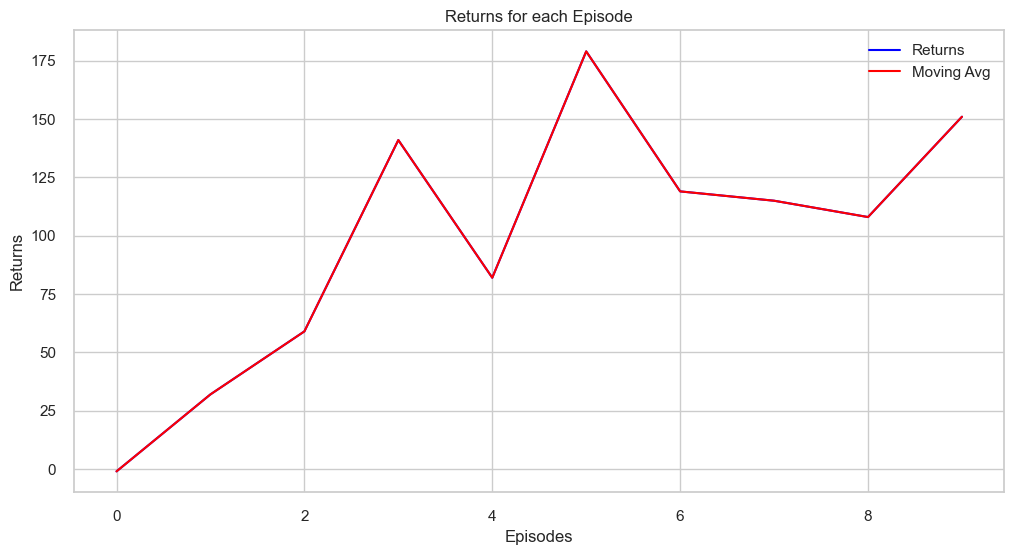

In [50]:
MA = pd.Series(returns).rolling(window=1).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=returns, label='Returns', color='blue')
sns.lineplot(data=MA, label='Moving Average', color='red')
plt.ylabel('Returns')
plt.xlabel('Episodes')
plt.title('Returns for each Episode')
plt.legend()
plt.show()